In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

%matplotlib inline

In [2]:
lrpd = pd.read_csv("../data/lrpd-clean.csv")

In [3]:
lrpd.head().T

,0,1,2,3,4
INCIDENT_NUMBER,2022-036059,2017-029450,2017-114829,2018-046714,2020-042339
INCIDENT_DATE,2022-03-30 17:38:00,2017-03-16 18:30:00,2017-09-15 03:14:00,2018-04-20 16:18:00,2020-04-18 18:15:00
LOCATION_DISTRICT,42.0,82.0,64.0,82.0,61.0
OFFENSE_DESCRIPTION,THEFT FROM MOTOR VEHICLE,THEFT OF MOTOR VEHICLE PARTS,RAPE,RAPE,RAPE
WEAPON_TYPE,NO WEAPON,NO WEAPON,NO WEAPON,UNKNOWN,HANDGUN
ZIP,72202.0,72206.0,0.0,0.0,0.0
LATITUDE,0.0,34.649362,0.0,0.0,0.0
LONGITUDE,0.0,-92.301959,0.0,0.0,0.0
WEEK_OF_MONTH,4,2,2,2,2
YEAR,2022,2017,2017,2018,2020


In [4]:
lrpd.tail().T

,87016,87017,87018,87019,87020
INCIDENT_NUMBER,2022-303291,2022-303160,2022-302870,2022-302451,2022-301998
INCIDENT_DATE,2022-12-08 00:00:00,2022-10-29 09:00:00,2022-10-23 14:30:00,2022-09-07 14:00:00,2022-07-21 08:00:00
LOCATION_DISTRICT,73.0,62.0,72.0,92.0,72.0
OFFENSE_DESCRIPTION,THEFT FROM MOTOR VEHICLE,ALL OTHER LARCENY,THEFT FROM MOTOR VEHICLE,SHOPLIFTING,THEFT FROM MOTOR VEHICLE
WEAPON_TYPE,NO WEAPON,NO WEAPON,NO WEAPON,NO WEAPON,NO WEAPON
ZIP,72223.0,72227.0,72211.0,72210.0,72211.0
LATITUDE,0.0,0.0,0.0,0.0,0.0
LONGITUDE,0.0,0.0,0.0,0.0,0.0
WEEK_OF_MONTH,1,4,3,1,3
YEAR,2022,2022,2022,2022,2022


### Question: What Year had the most amount of crime, and how many crimes occurred that year?

In [5]:
yearly_crimes = pd.DataFrame({'Year': [], 'Crimes': []})

In [6]:
lrpd["INCIDENT_DATE"] = pd.to_datetime(lrpd["INCIDENT_DATE"])

In [7]:
for year in lrpd["INCIDENT_DATE"].dt.year.unique():
    yearly_data = lrpd.loc[lrpd["INCIDENT_DATE"].dt.year == year]
    yearly_crime = yearly_data["OFFENSE_DESCRIPTION"].value_counts().sum()

    yearly_crimes.loc[len(yearly_crimes.index)] = [year, yearly_crime]

In [8]:
yearly_crimes = yearly_crimes.set_index("Year").sort_index()
yearly_crimes

,Crimes
Year,
2017.0,16210.0
2018.0,15140.0
2019.0,14414.0
2020.0,12248.0
2021.0,13663.0
2022.0,13588.0
2023.0,1758.0


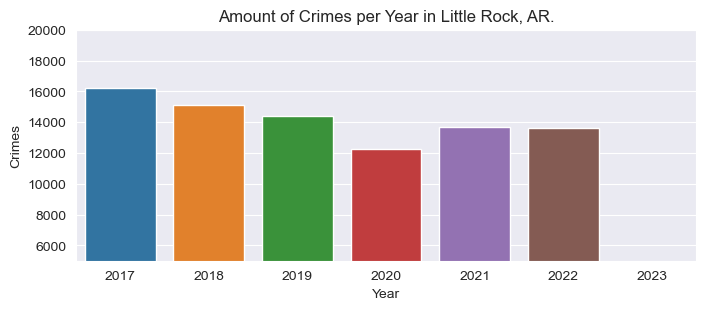

In [9]:
yearly_crimes.index = yearly_crimes.index.astype(int)
sns.barplot(data=yearly_crimes, x=yearly_crimes.index, y=yearly_crimes["Crimes"])
plt.title("Amount of Crimes per Year in Little Rock, AR.")
plt.xlabel("Year")
plt.ylabel("Crimes")

plt.ylim(5000, 20000)
plt.gcf().set_size_inches(8, 3)
plt.savefig("../yearly-crimes.png", dpi=300)
plt.show()

### Answer: 2017, ~16,000

### Question: What were the most common Violent Crimes? Non-Violent?

In [10]:
violent_crime_occurrence = pd.DataFrame({ "Crime": [], "Occurrence": [] })
nonviolent_crime_occurrence = pd.DataFrame({ "Crime": [], "Occurrence": [] })

violent_offenses = lrpd.loc[lrpd["CRIME_TYPE"] == "Violent Crime"]
for offense in violent_offenses["OFFENSE_DESCRIPTION"].unique():
    occurrence = violent_offenses.loc[violent_offenses["OFFENSE_DESCRIPTION"] == offense].value_counts().sum()

    violent_crime_occurrence.loc[len(violent_crime_occurrence.index)] = [offense, occurrence]

nonviolent_offenses = lrpd.loc[lrpd["CRIME_TYPE"] == "Non-Violent Crime"]
for offense in nonviolent_offenses["OFFENSE_DESCRIPTION"].unique():
    occurrence = nonviolent_offenses.loc[nonviolent_offenses["OFFENSE_DESCRIPTION"] == offense].value_counts().sum()

    nonviolent_crime_occurrence.loc[len(nonviolent_crime_occurrence.index)] = [offense, occurrence]

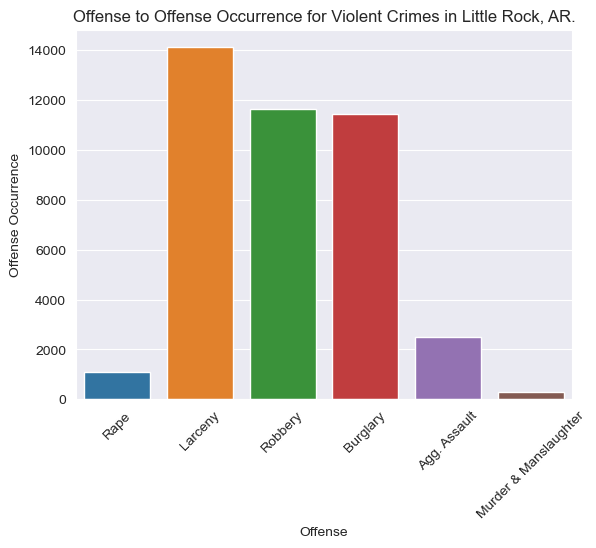

In [11]:
ax = sns.barplot(data=violent_crime_occurrence, x=["Rape", "Larceny", "Robbery", "Burglary", "Agg. Assault", "Murder & Manslaughter"], y=violent_crime_occurrence["Occurrence"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Offense to Offense Occurrence for Violent Crimes in Little Rock, AR.")
plt.xlabel("Offense")
plt.ylabel("Offense Occurrence")
plt.show()

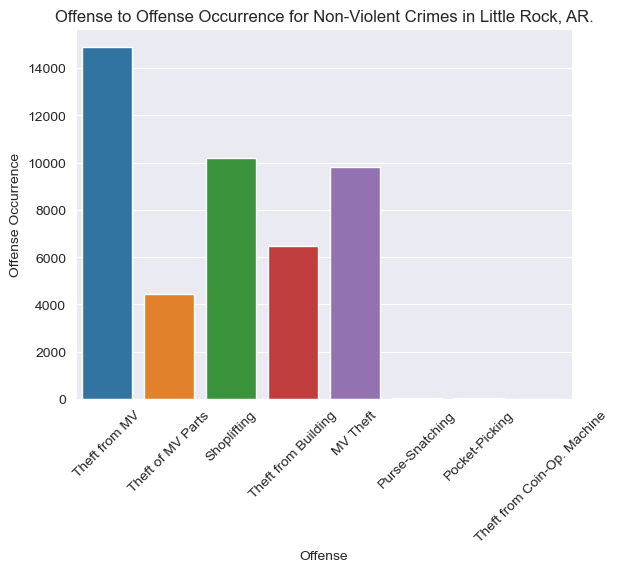

In [12]:
ax = sns.barplot(data=nonviolent_crime_occurrence, x=["Theft from MV", "Theft of MV Parts", "Shoplifting", "Theft from Building", "MV Theft", "Purse-Snatching", "Pocket-Picking", "Theft from Coin-Op. Machine"], y=nonviolent_crime_occurrence["Occurrence"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Offense to Offense Occurrence for Non-Violent Crimes in Little Rock, AR.")
plt.xlabel("Offense")
plt.ylabel("Offense Occurrence")
plt.show()

### Answer: Violent - Larceny, Non-Violent - Theft from MV

### Question: What Zip had the most crimes?

In [13]:
zips = lrpd["ZIP"].unique()
zips

array([72202., 72206.,     0., 72210., 72204., 72209., 72103., 72227.,
       72002., 72211., 72207., 72205., 72201., 72223., 72212., 72122.,
       72114., 72070., 72023., 72255., 72225., 72019., 72118., 72087.,
       72117., 72116., 72120., 72076., 72113., 72135., 72005., 72203.,
       72111., 72143., 72217.])

In [14]:
zip_offense_counts = pd.DataFrame({ "Zip": [], "Offense Count": []})

for zip in zips:
    data = lrpd.loc[lrpd["ZIP"] == zip]
    crimes = data["OFFENSE_DESCRIPTION"].value_counts().sum()

    zip_offense_counts.loc[len(zip_offense_counts.index)] = [zip, crimes]

zip_offense_counts.set_index("Zip").sort_values(by="Offense Count")

,Offense Count
Zip,
72070.0,1.0
72111.0,1.0
72005.0,1.0
72087.0,1.0
72255.0,1.0
72023.0,1.0
72143.0,1.0
72217.0,1.0
72203.0,2.0


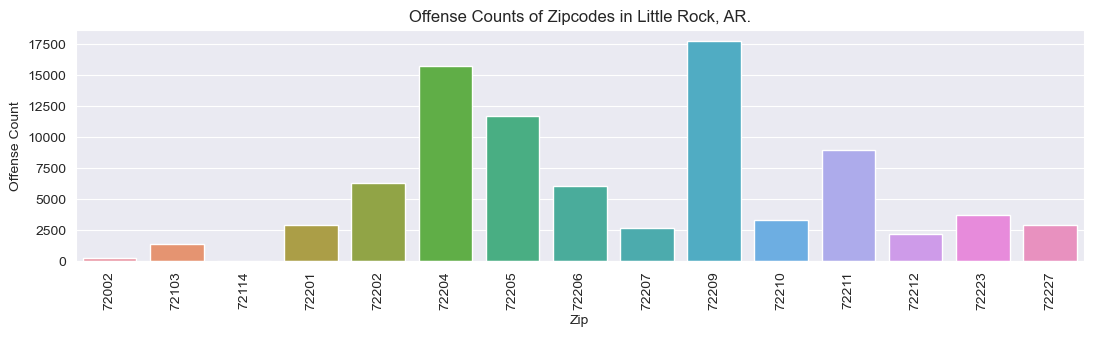

In [15]:
zip_offense_counts["Zip"] = zip_offense_counts["Zip"].astype(int)
zip_offense_counts = zip_offense_counts.loc[zip_offense_counts["Zip"] != 0]
top5 = zip_offense_counts.sort_values(by="Offense Count", ascending=False).head(15)
ax = sns.barplot(data=top5, x=top5["Zip"], y=top5["Offense Count"])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Offense Counts of Zipcodes in Little Rock, AR.")
plt.xlabel("Zip")
plt.ylabel("Offense Count")
plt.gcf().set_size_inches(13, 3)
plt.savefig("../top5-zipcodes.png", bbox_inches='tight')
plt.show()

### Answer: Zip 72209 had 16k+ crimes.

### Question: What weapons were used the most in Violent Crimes?

### Seasonality of crimes (According to day of the year), from 2017 to 2021

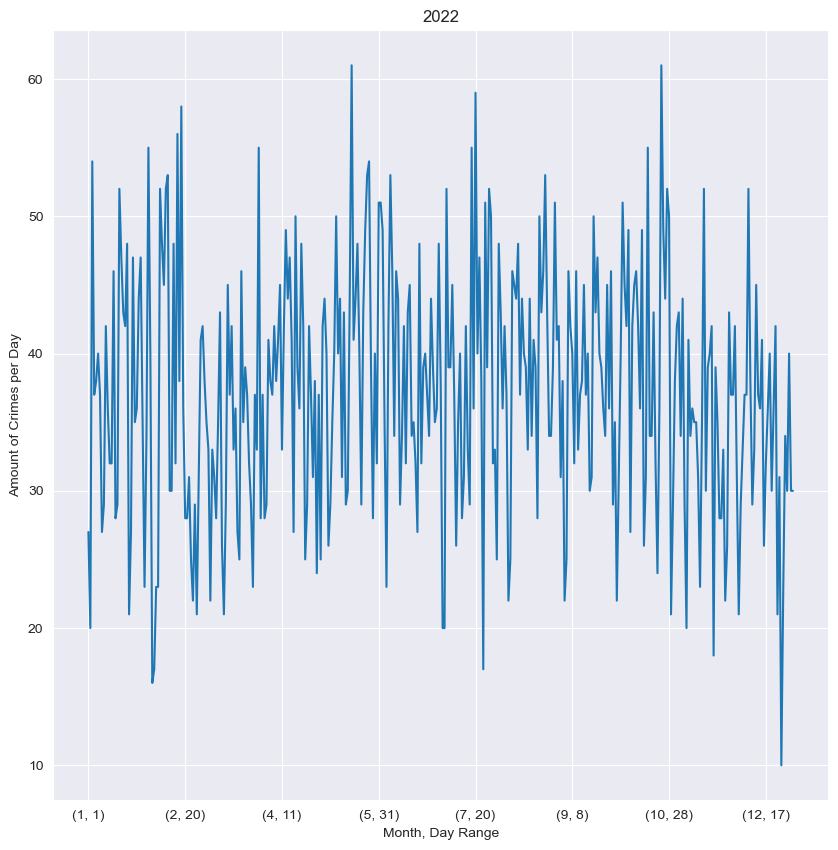

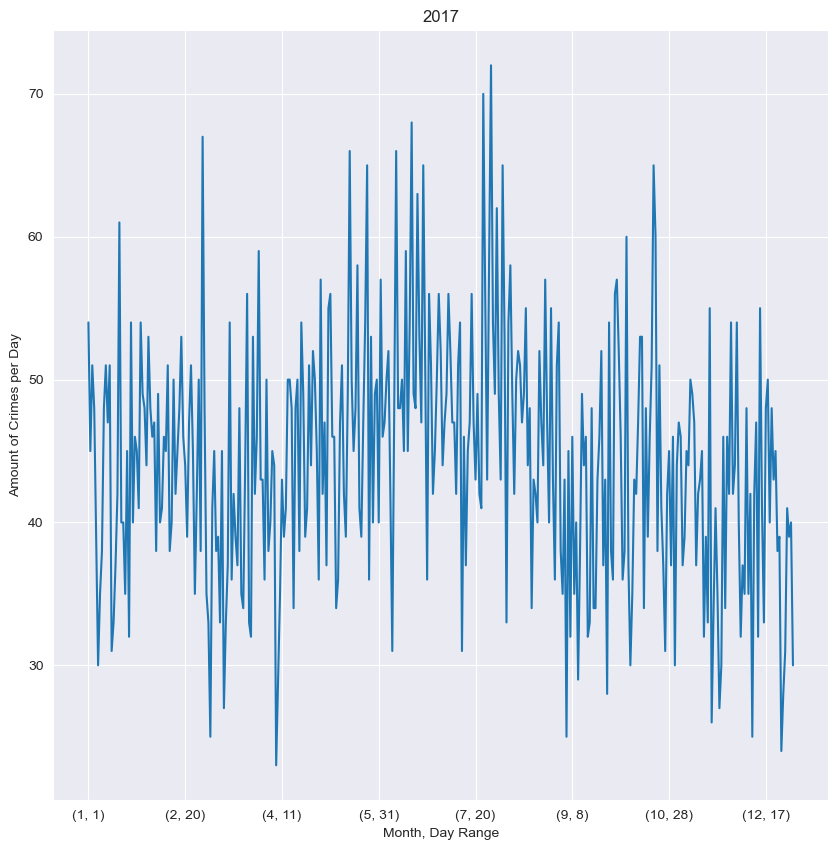

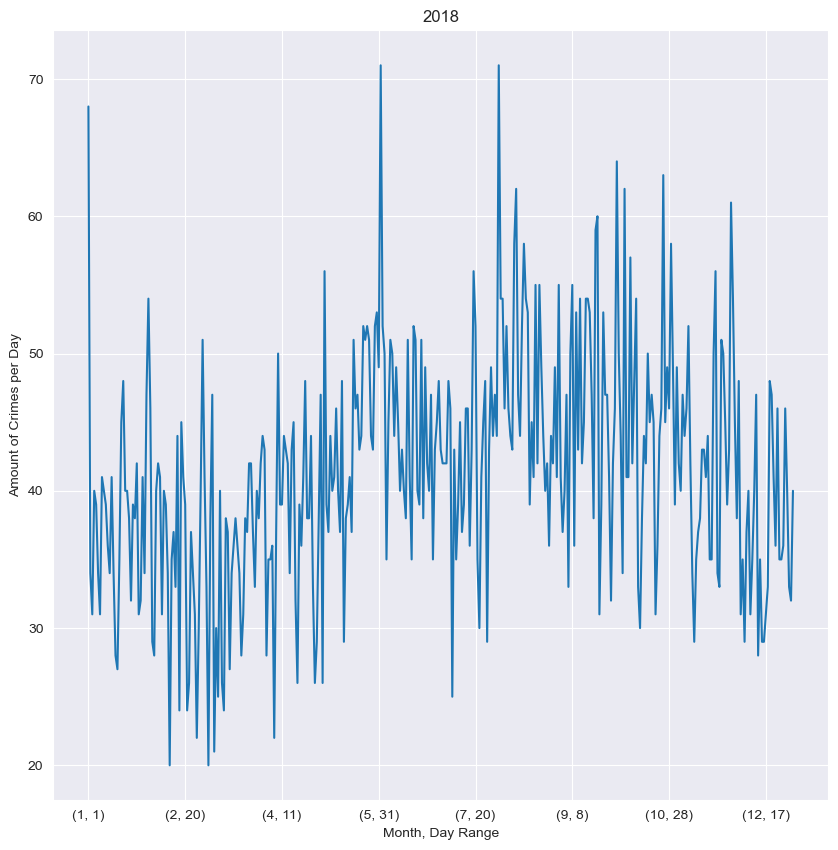

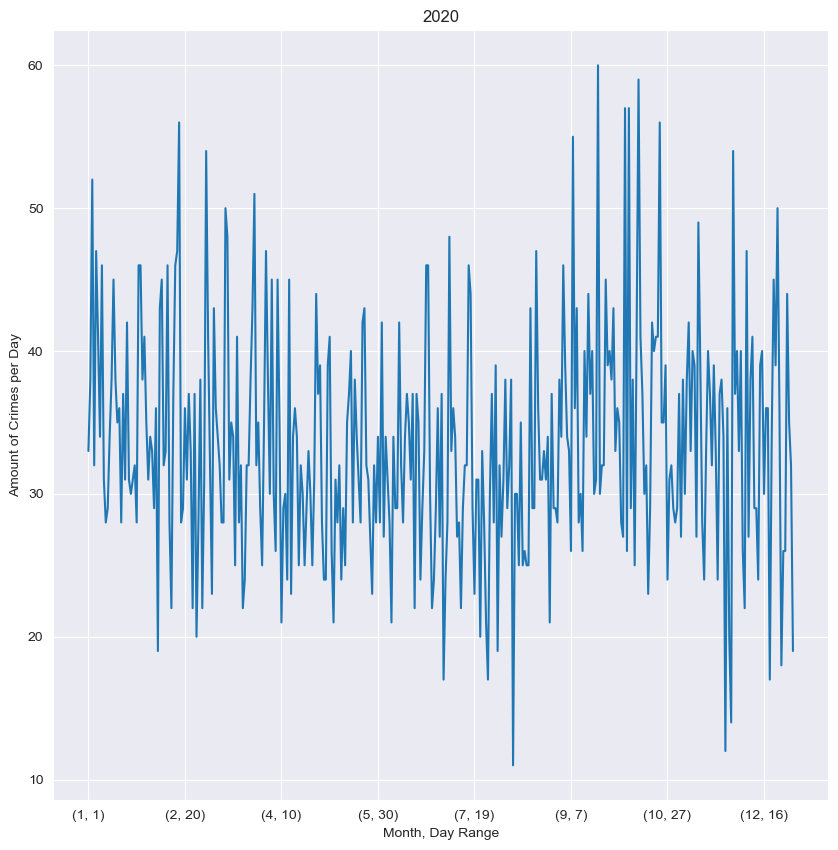

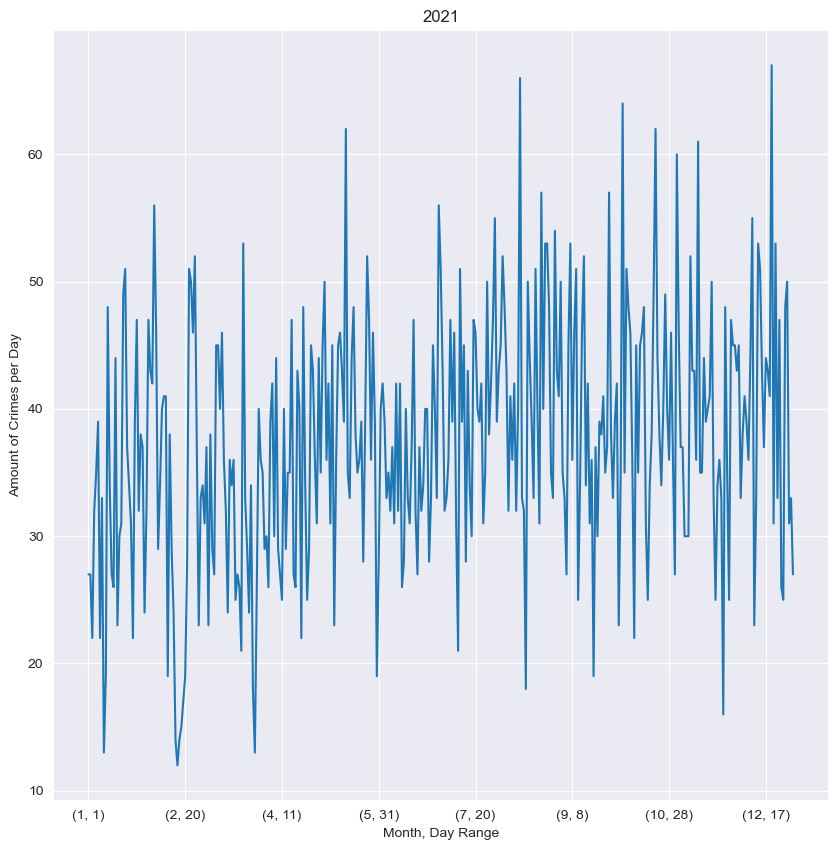

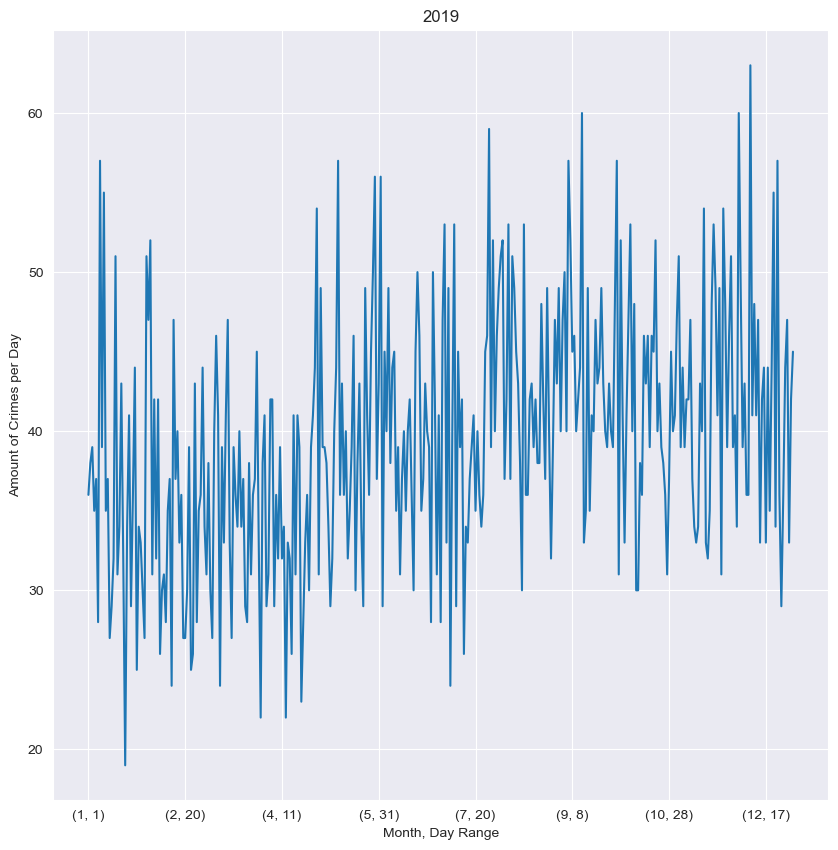

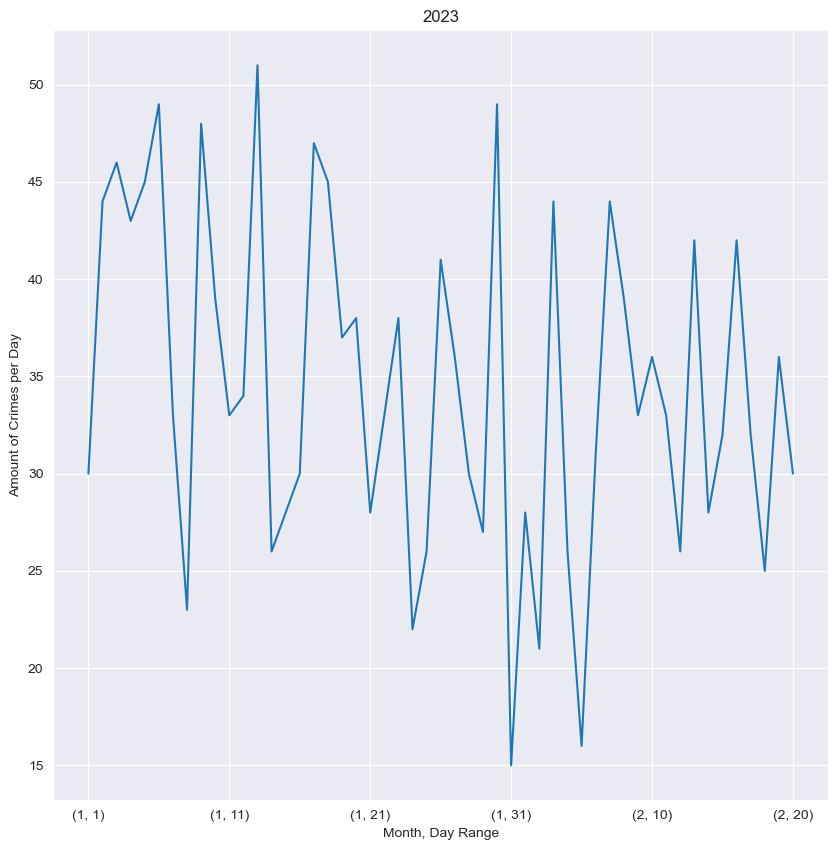

In [16]:
years = lrpd["YEAR"].unique()

for year in years:
    crimesInYear = lrpd.loc[lrpd["YEAR"] == year]
    crimesPerDayInYear = crimesInYear.groupby(["MONTH", "DAY"]).count()["INCIDENT_NUMBER"]

    fig, ax = plt.subplots(figsize=(10, 10))
    lineplt = crimesPerDayInYear.plot(kind='line', ax=ax, xlabel="Month, Day Range", ylabel="Amount of Crimes per Day")
    plt.title(year)

### Interactive Map of crimes from 2017 to 2022

In [17]:
#Create heatmap of crimes in Little Rock
from collections import defaultdict, OrderedDict

data = defaultdict(list)

lrpd_lat_long = lrpd.dropna(subset=["LATITUDE", "LONGITUDE"])

for r in lrpd_lat_long.itertuples():
    data[r.YEAR].append([r.LATITUDE, r.LONGITUDE])

data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

# Available map tile types in Folium:
    # “OpenStreetMap”
    # “Mapbox Bright” (Limited levels of zoom for free tiles)
    # “Mapbox Control Room” (Limited levels of zoom for free tiles)
    # “Stamen” (Terrain, Toner, and Watercolor)
    # “Cloudmade” (Must pass API key)
    # “Mapbox” (Must pass API key)
    # “CartoDB” (positron and dark_matter)

m = folium.Map(location=[34.7466, -92.2896], zoom_start=12, tiles="OpenStreetMap")
m.add_child(folium.LatLngPopup())

hm = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()),
                     radius=10,
                     auto_play=True,
                     max_opacity=0.3)
hm.add_to(m)
m.save("../visualizations/folium-map.html")

m

In [18]:
#Create heatmap of crimes in Little Rock and using folium, highlight Zipcodes
